In [1]:
#PARTE 1 - ENTRADA EN CALOR

#Análisis exploratorio

#Exploración Inicial
#Realizar una descripción del dataset elegido detallando:
#● Nombres y tipos de las columnas, y descripción de cada una.
#● Resumen del dataset mostrando un conjunto reducido de filas (las primeras y las
#últimas)
#● Cantidad de valores nulos por columna

#Variables cualitativas
#● Sobre las variables de este tipo mostrar los distintos valores existentes y la cantidad de
#filas correspondientes a cada uno.
#○ Armar un nuevo dataframe con estos datos.
#● Para cada variable compare en un gráfico de barras la cantidad de filas pertenecientes
#a cada valor.
#○ ¿Es posible realizar este gráfico con un histograma? Explique las diferencias
#entre estos dos tipos de gráficos.

#Variables cuantitativas
#1) Sobre variables de este tipo calcular las siguientes medidas de resumen, y armar un
#nuevo dataframe con estos datos:
#● Media
#● Mediana
#● Moda
#● Primer y tercer cuartil
#● Rango
#2) Correlación de atributos
#● Explorar las variables tomándolas de a pares utilizando un gráfico scatter_matrix
#● Calcular la correlación de Pearson y graficar las correlaciones obtenidas en un
#gráfico de tipo heatmap

#3) Seleccionar un subconjunto de variables que resulten de interés y analizarlas utilizando:
#● Histogramas
#● Gráfico de violín (utilizar la librería matplotlib.pylot)
#● Boxplots
#● Density plot. Analizar si los datos presentan algún tipo de asimetría y explicar
#cuál.
#● Gráfico a elección. Seleccionar otro tipo de gráfico de una librería distinta a las
#propuestas en la materia y realizar un análisis a elección.

#Conclusiones
#Extraer conclusiones a partir de los análisis realizados en los puntos anteriores, y justificar cada
#conclusión.
#Por ejemplo:
#¿Se encontró algún tipo de comportamiento particular en alguna variable?
#¿Existen variables correlacionadas y por qué? ¿Es esperable o no?

In [2]:
#PARTE 2 - PREGUNTAS DE INVESTIGACION

#Luego de la entrada en calor les proponemos trabajar con un nuevo set de datos (disponible
#para descargar en el siguiente link ) y les planteamos los siguientes objetivos:
#1.- Explorar el set de datos de forma libre aplicando las técnicas que consideren adecuadas
#(vistas en la materia)
#2.- A partir de la exploración realizada plantear dos preguntas de investigación que les resulten
#interesantes para formular sobre los datos propuestos. Por ejemplo, ¿existe alguna relación
#entre el género musical y alguna de las otras variables?
#3.- Elegir dos visualizaciones (como mínimo) que permitan abordar sus preguntas de
#investigación e interpretar los resultados.

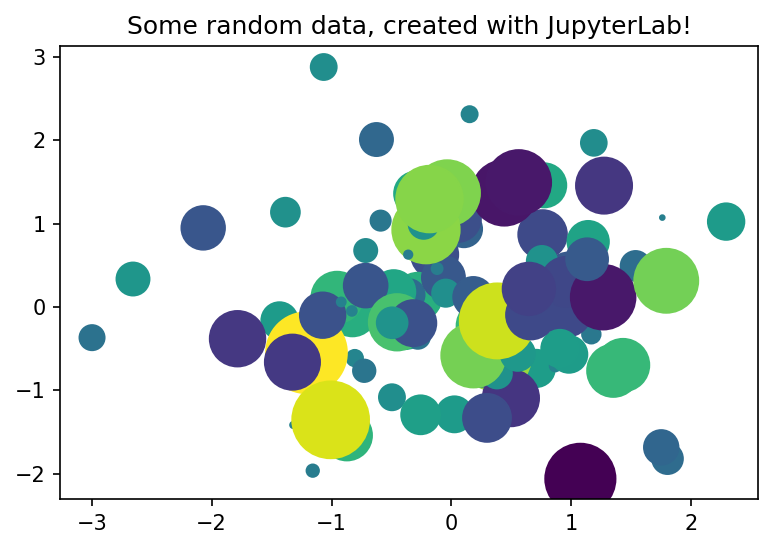

In [3]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 150

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

## Ejemplo de estilos aplicables al Markdown de jupyter

[Link](https://jupyter.org/try-jupyter/lab/)

## Ejemplos de informes hechos en jupyter por la Universidad de Oslo

[Link](https://uio-ccse.github.io/computational-essay-showroom/examples.html)

# Trabajo Práctico 1 : Visualización de datos

## Analisis del dataset 'endorsements' con informacion acerca del respaldo politico a candidatos a presidente de los Estados Unidos desde 1980 al 2012

### Introduccion

Durante el periodo de elecciones presidenciales en los Estados Unidos, los representantes de cada partido politico hacen publico el respaldo a algun candidato que se presenta.

Este dataset sirve como herramienta para analizar la importancia del apoyo politico en el transcurso de la eleccion y como impacta en su resultado, cuantificando el respaldo en lo que denomina "endorsement points" o "puntos de apoyo", dandole un peso a ese respaldo segun el representante que lo expresa y su cargo publico.


### Como funcionan los puntos de apoyo?

Los puntos de apoyo son una cuantificacion del respaldo que ofrece el representante de un partido politico a un candidato, medido segun el cargo que ocupa al momento de expresarlo. El respaldo de los gobernadores pesa 10 puntos, el de los senadores 5 puntos y el respaldo del resto de los representantes pesa 1 punto. 

### Análisis exploratorio

Cargamos el dataset 'endorsements-june-30' del input FiveThirtyEight para su analisis

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import zipfile

Dataset = "endorsements-june-30"

with zipfile.ZipFile("../input/fivethirtyeight/data/"+Dataset+".zip","r") as z:
    z.extractall(".")
    
data = pd.read_csv(Dataset+"/endorsements-june-30.csv")

#### Exploración inicial

Este es un set de datos de las elecciones que se llevaron a cabo en Estados Unidos desde 1980 hasta 2012 inclusive, a continuación se detallan las variables de los datos junto a sus tipos y una breve descripción. 

| Nombre                               | Tipo de variable      | Descripción                                                               |
|--------------------------------------|-----------------------|---------------------------------------------------------------------------|
| **Year** **                             | Cuantitativa discreta | Indica el año electivo, va desde 1980 hasta 2012 con intervalos de 4 años |
| **Party**                            | Cualitativa binaria   | Indica si pertenece al partido Republicano o Democrático                  |
| **Candidate**                        | Cualitativa nominal   | Indica el nombre del candidato                                            |
| **Endorsement points**               | Cuantitativa discreta | Indica la cantidad de puntos de apoyo en el colegio electoral             |
| **Percentage of endorsement points** | Cuantitativa continua | Indica el porcentaje de puntos de apoyo por partido politico en el colegio electoral           |
| **Money raised**                     | Cuantitativa continua | Indica el dinero recaudado para la campaña electoral                      |
| **Percentage of money**              | Cuantitativa continua | Indica el porcentaje del dinero recaudado para la campaña electoral       |
| **Primary vote percentage**          | Cuantitativa continua | Indica el porcentaje de votos en las elecciones primarias                 |
| **Won primary**                      | Cualitativa binaria   | Indica si ganó en elecciones primarias                                    |

** Consultar tipo de variable **year**, si es cuantitativa o cualitativa

Aquí se muestran las primeras y últimas 5 filas del set (el cual tiene un total de 109 filas).

In [5]:
data

,year,party,candidate,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage,won_primary
0,1980,Republican,George H.W. Bush,5,6.32911,1475332.00,16.83,23.81,No
1,1980,Republican,Lowell Weicker,0,0.00000,60000.00,0.68,0.00,No
2,1980,Republican,Phil Crane,0,0.00000,2500000.00,28.53,0.76,No
3,1980,Republican,John Connally,6,7.59494,2200000.00,25.10,0.64,No
4,1980,Republican,Bob Dole,0,0.00000,253286.00,2.89,0.06,No
...,...,...,...,...,...,...,...,...,...
104,2012,Republican,Ron Paul,6,9.09091,4514165.68,14.13,10.89,No
105,2012,Republican,Mitt Romney,42,63.63640,18195222.87,56.95,52.17,Yes
106,2012,Republican,Michele Bachmann,0,0.00000,4288335.65,13.42,0.21,No
107,2012,Republican,Rick Perry,0,0.00000,0.00,0.00,0.28,No


Se puede ver que no hay valores nulos en ninguna columna.

In [6]:
data.isna().sum()

year                             0
party                            0
candidate                        0
endorsement_points               0
percentage_endorsement_points    0
money_raised                     0
percentage_of_money              0
primary_vote_percentage          0
won_primary                      0
dtype: int64

#### Variables cualitativas

A continuacion se detallan las variables cualitativas que aparecen en el dataset


| Nombre                               | Tipo de variable      |
|--------------------------------------|-----------------------|
| **Partido politico**                            | Cualitativa binaria   |
| **Candidato**                        | Cualitativa nominal   |
| **Gano elecciones primarias**                      | Cualitativa binaria   |


Junto con los valores existentes y la cantidad de filas en las que aparecen cada uno

In [7]:
cant_partidos_a = data[['party']].groupby(['party'])['party'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
cant_partidos_b = pd.DataFrame({'variable': ['party'] * len(cant_partidos_a)})
cant_partidos = pd.concat([cant_partidos_b, cant_partidos_a], axis=1)
cant_partidos.columns = ['Variable', 'Valor', 'Cantidad']

cant_candidatos_a = data[['candidate']].groupby(['candidate'])['candidate'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
cant_candidatos_b = pd.DataFrame({'variable': ['candidate'] * len(cant_candidatos_a)})
cant_candidatos = pd.concat([cant_candidatos_b, cant_candidatos_a], axis=1)
cant_candidatos.columns = ['Variable', 'Valor', 'Cantidad']

cant_primarias_a = data[['won_primary']].groupby(['won_primary'])['won_primary'].count().reset_index(name='count')
cant_primarias_b = pd.DataFrame({'variable': ['won_primary'] * len(cant_primarias_a)})
cant_primarias = pd.concat([cant_primarias_b, cant_primarias_a], axis=1)
cant_primarias.columns = ['Variable', 'Valor', 'Cantidad']

cant_cualitativas = pd.concat([cant_primarias, cant_partidos, cant_candidatos])
cant_cualitativas

,Variable,Valor,Cantidad
0,won_primary,No,97
1,won_primary,Yes,12
0,party,Democratic,48
1,party,Republican,61
0,candidate,Al Gore,2
...,...,...,...
85,candidate,Tom Tancredo,1
86,candidate,Tom Vilsack,1
87,candidate,Tommy Thompson,1
88,candidate,Walter Mondale,1


In [8]:
def simple_barplot(df, x, y, label):
    sns.set_style("darkgrid")
    ax = sns.barplot(x=x, y=y, data=df ,alpha=0.5, orient='v')
    ax.set_title(label)
    ax.set_xlabel(x)
    ax.set_ylabel('Cantidad')
    if len(df) > 5:
        plt.xticks(rotation=90)
    plt.show()

### Partido político (party)

In [9]:
data_partidos = data[['party']].groupby(['party'])['party'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_partidos.columns = ['Partido politico', 'Cantidad de registros']
data_partidos

,Partido politico,Cantidad de registros
1,Republican,61
0,Democratic,48


In [10]:
data[['party']].value_counts()

party     
Republican    61
Democratic    48
dtype: int64

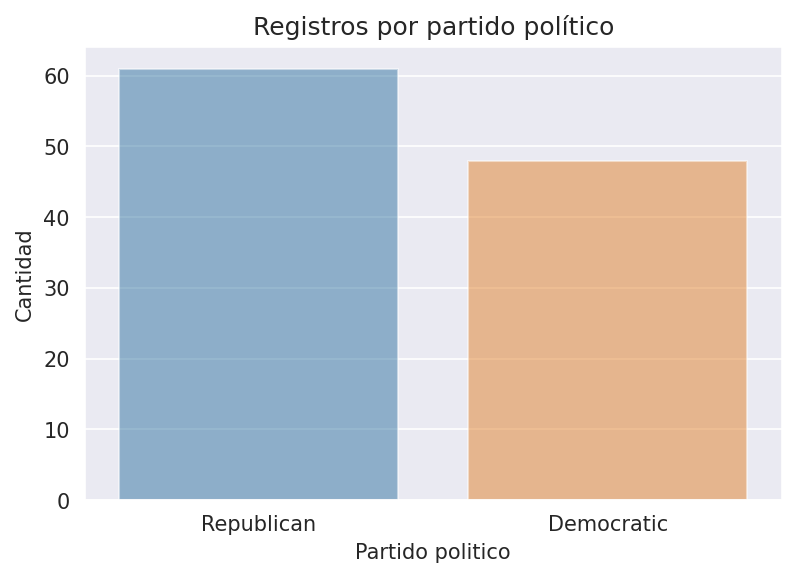

In [11]:
simple_barplot(data_partidos, 'Partido politico', 'Cantidad de registros', "Registros por partido político")

### Candidato (candidate)

In [12]:
data_candidatos = data[['candidate']].groupby(['candidate'])['candidate'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_candidatos.columns = ['Candidato', 'Cantidad de registros']
data_candidatos

,Candidato,Cantidad de registros
3,Alan Keyes,3
10,Bob Dole,3
0,Al Gore,2
79,Ron Paul,2
31,Gary Hart,2
...,...,...
30,Gary Bauer,1
29,Fred Thompson,1
28,Eugene McCarthy,1
27,Ernest Hollings,1


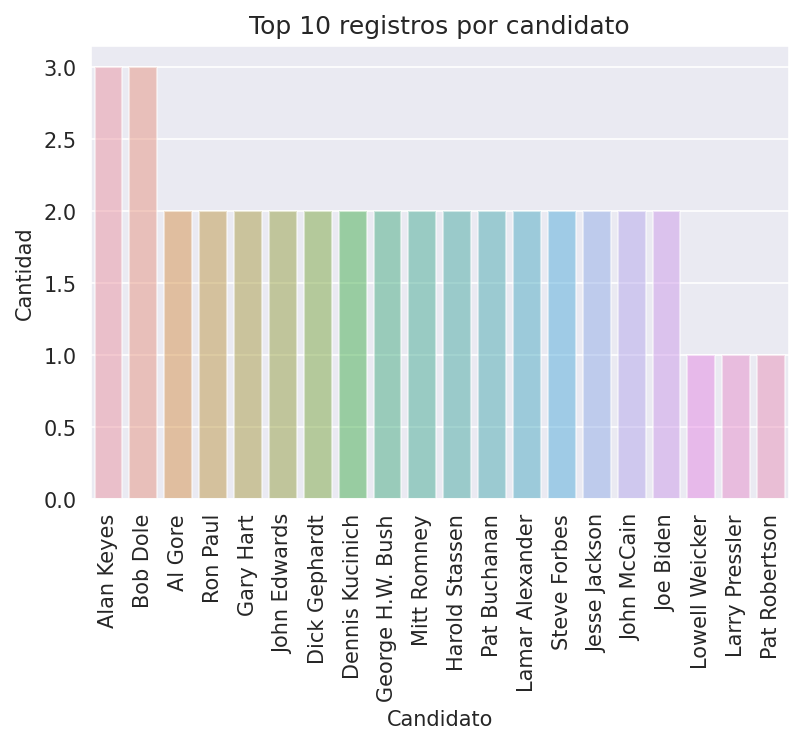

In [13]:
simple_barplot(data_candidatos.head(20), 'Candidato', 'Cantidad de registros', "Top 10 registros por candidato")

### Ganó elecciones primarias (won_primary)

In [14]:
data_primarias = data[['won_primary']].groupby(['won_primary'])['won_primary'].count().reset_index(name='count')
data_primarias.columns = ['Gano elecciones primarias', 'Cantidad de registros']
data_primarias

,Gano elecciones primarias,Cantidad de registros
0,No,97
1,Yes,12


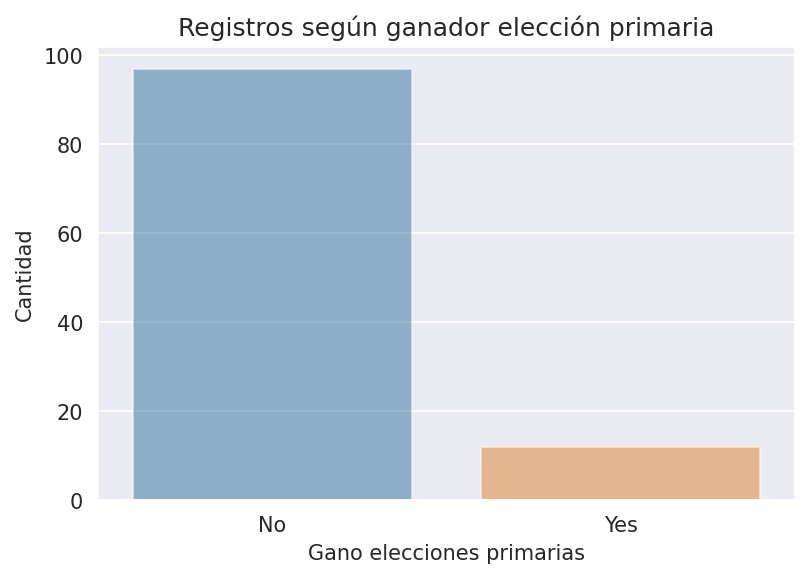

In [15]:
simple_barplot(data_primarias, 'Gano elecciones primarias', 'Cantidad de registros', "Registros según ganador elección primaria")

Estos gráficos no tendría sentido compararlos mediante un histograma. El histograma nos sirve cuando el soporte es continuo (es decir cuando la variable que queremos ver su distribución es continua) y en este caso estamos comparando cantidades de variables cualitativas/categóricas. Al estar comparando variables categóricas, cada "barrita" o columna del gráfico de barra representa un grupo definido por la categoría.

## Variables Cuantitativas
Para el estudio de estas variables se separará el dataset en dos subsets, uno para el partido Demócrata y otro para el Republicano y se verá qué tanto influye el partido en los datos.

In [16]:
data_dem = data[data['party'] == 'Democratic']
data_rep = data[data['party'] == 'Republican']

A continuación se analizan las medidas de resumen para el set general y los dos subsets.

In [17]:
data.describe()

,year,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage
count,109.000000,109.000000,109.000000,1.090000e+02,109.000000,109.000000
mean,1996.917431,17.596330,10.091742,5.225899e+06,11.008991,10.807431
std,10.293947,46.078861,19.226760,1.041097e+07,15.148326,18.302088
min,1980.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1988.000000,0.000000,0.000000,1.388260e+05,0.360000,0.110000
50%,1996.000000,2.000000,0.735294,1.567088e+06,5.680000,0.910000
75%,2008.000000,16.000000,9.565220,4.288336e+06,15.970000,14.170000
max,2012.000000,382.000000,96.124000,6.198149e+07,80.910000,75.390000


In [18]:
data_dem.describe()

,year,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage
count,48.000000,48.000000,48.000000,4.800000e+01,48.000000,48.00000
mean,1995.500000,12.770833,10.416664,6.078372e+06,12.500208,12.15000
std,9.211464,24.933306,19.252884,1.260020e+07,16.956381,19.09621
min,1984.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,1988.000000,0.000000,0.000000,9.438426e+04,0.175000,0.21250
50%,1992.000000,3.500000,2.494090,1.117911e+06,6.715000,1.78000
75%,2004.000000,14.250000,11.948525,6.720860e+06,18.115000,18.38500
max,2008.000000,124.000000,96.124000,6.198149e+07,80.910000,75.39000


In [19]:
data_rep.describe()

,year,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage
count,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000
mean,1998.032787,21.393443,9.836066,4.555101e+06,9.835574,9.750984
std,11.018117,57.459632,19.362105,8.348311e+06,13.588498,17.740023
min,1980.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1988.000000,0.000000,0.000000,2.017450e+05,0.560000,0.040000
50%,2000.000000,0.000000,0.000000,1.914747e+06,3.520000,0.640000
75%,2008.000000,18.000000,7.913670,3.416826e+06,13.810000,10.890000
max,2012.000000,382.000000,76.861200,3.614054e+07,62.200000,67.900000


De estas tablas se puede deducir lo siguiente:
* El rango de años y la información que se tiene para cada uno no es pareja entre partidos, es decir, hay años para los cuales hay más datos de un partido que de otro (incluso en años como 1980 y 2012 no hay datos correspondientes al pertido Democráta). Esto significa que puede haber un sesgo en la información que tenemos a pesar de que sólo haya 13 registros más de candidatos republicanos que demócratas.
* Hay diferencia en los puntos de apoyo obtenidos en el Colegio Electoral, siendo el partido Republicano el que más obtuvo. Esto se ve fácilmente al comparar las dos medias siendo 12.77 la del Demócrata y 21.39 la del Republicano, y el valor máximo de cada uno, siendo 124 y 382 respectivamente. Otro detalle a tener en cuenta es la desviación estándar, la del Demócrata es 24.93 y la del Republicano es 57.46, significa que en éste último hay mayor diferencia entre candidatos.
* Otra diferencia importante se da en el dinero recaudado, siendo el partido Demócrata el que tiene los valores más altos.

La correlación de Pearson para el set y cada subset es:

Para el set principal:

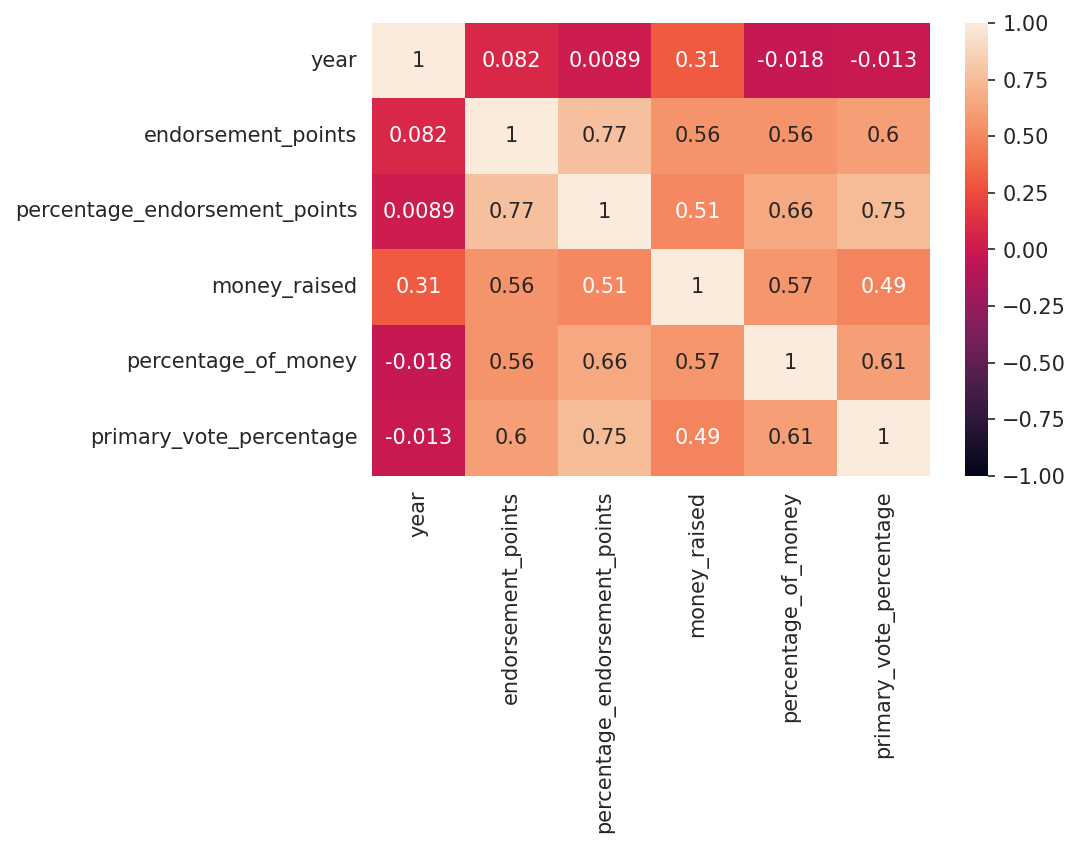

In [20]:
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

Para el subset con el partido Demócrata

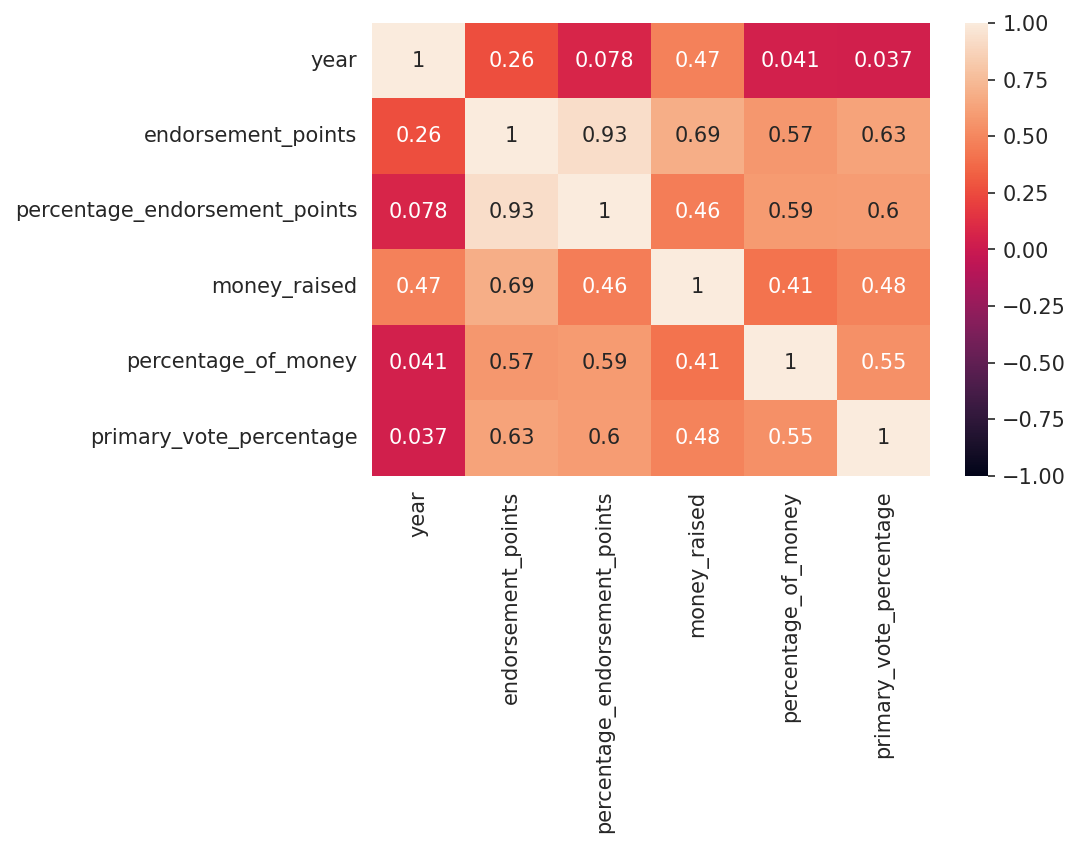

In [21]:
heatmap = sns.heatmap(data_dem.corr(), vmin=-1, vmax=1, annot=True)

Y finalmente para el subset con el partido Republicano

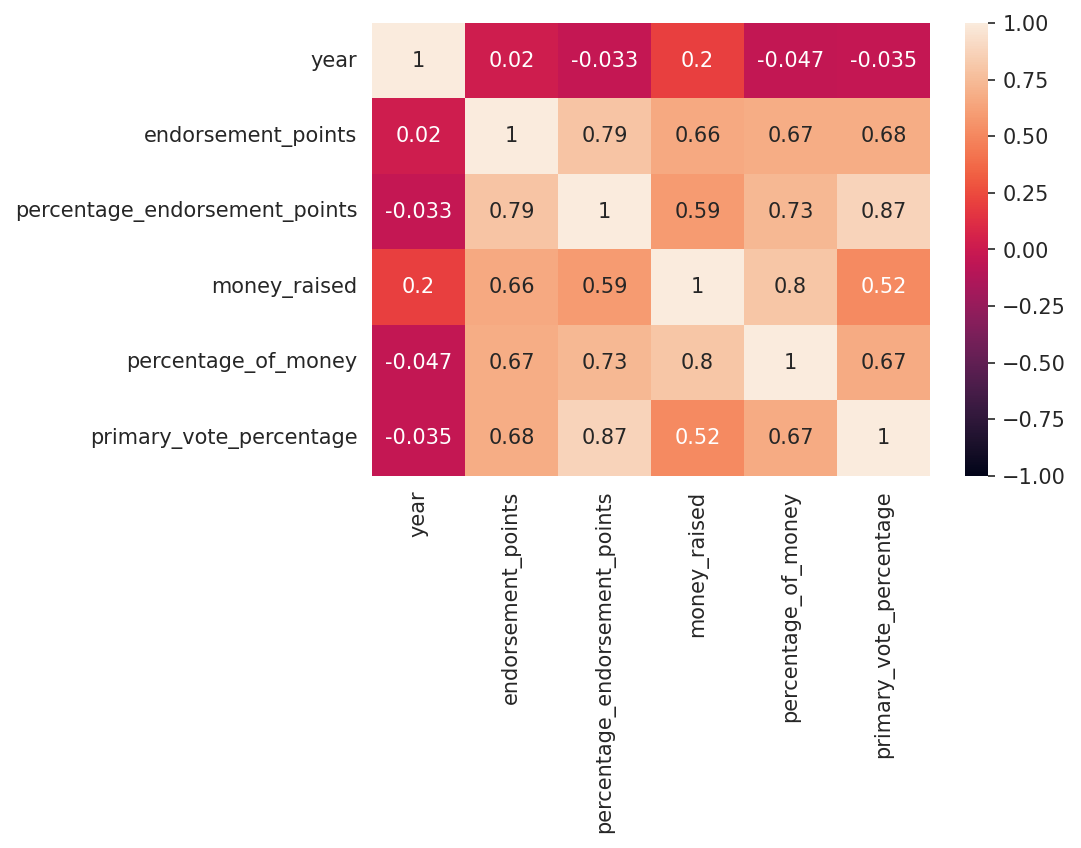

In [22]:
heatmap = sns.heatmap(data_rep.corr(), vmin=-1, vmax=1, annot=True)

En estos valores se puede ver que la correlación entre el año y las otras variables es positiva en todos los casos del partido Demócrata pero no en todos los casos del partido Republicano. Además, en los casos en donde ambos son positivos los valores en el patido Demócrata son mayores. Esto quiere decir que a medida que pasan los años va aumentando el apoyo que recibe el partido Demócrata.  
Para el resto de pares de variables ambos partidos tienen correlaciones de Pearson similares.

A continuación se muestran 3 gráficos, en ellos se compara de a pares las variables cuantitativas para el set principal y los dos subsets antes mencionados.

Para el set principal:

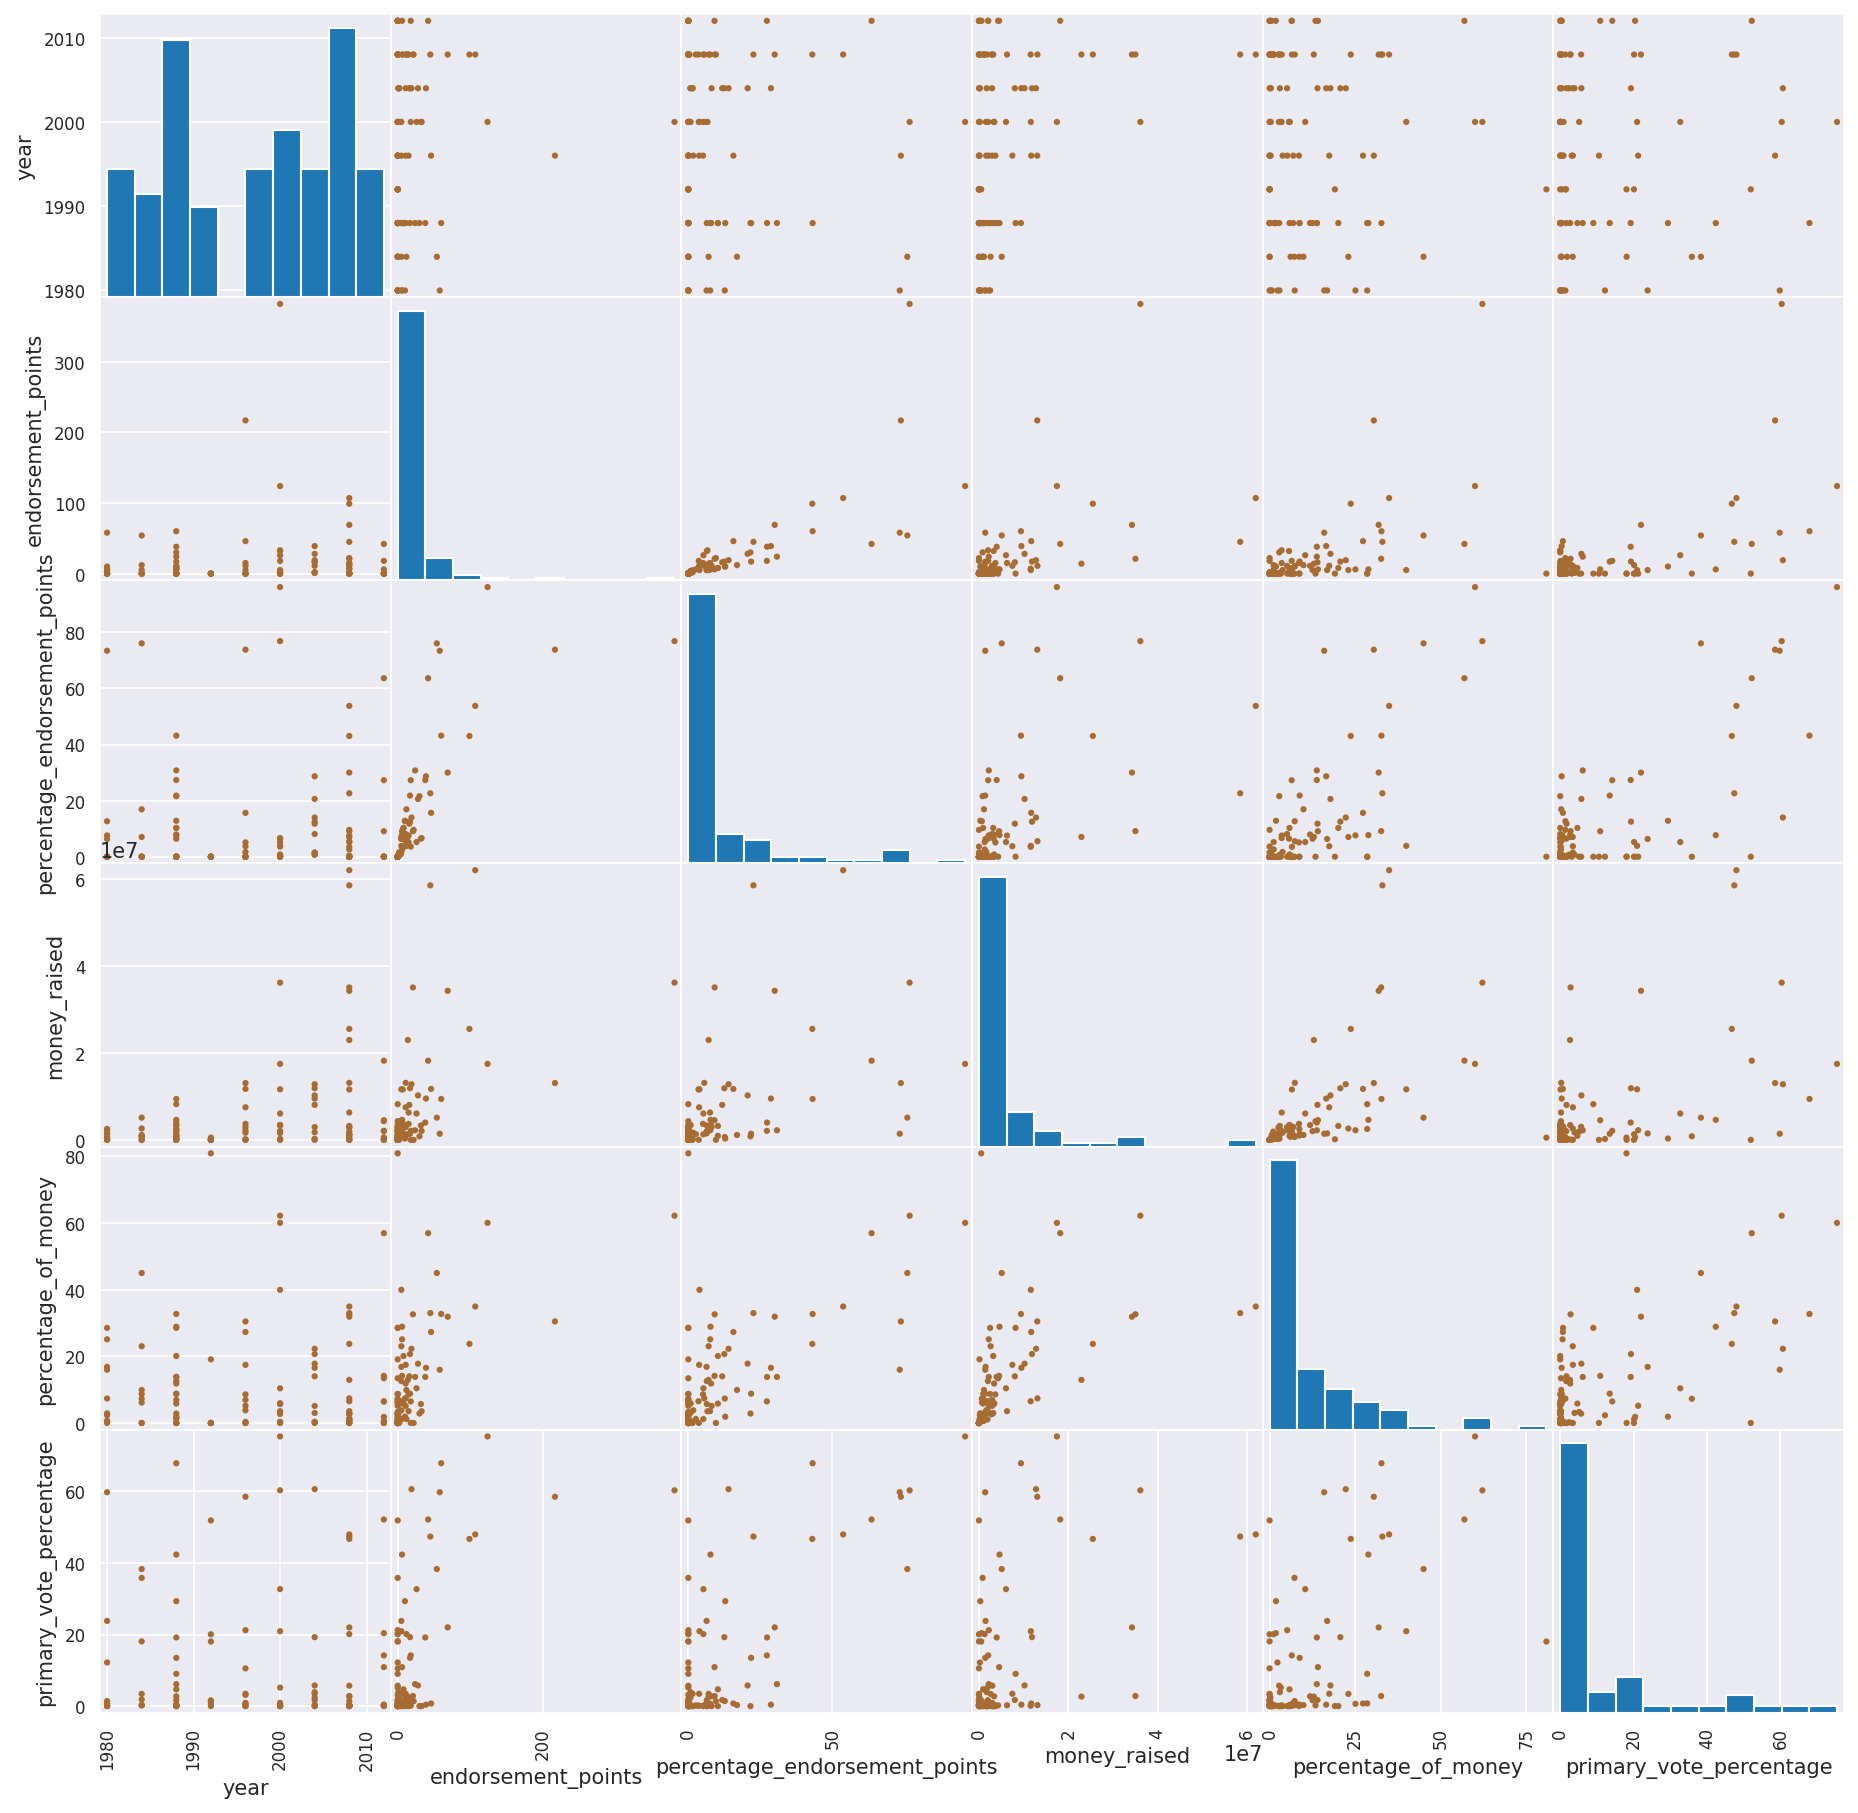

In [23]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=1, figsize = (15,15), c='#a76c31');

Para el subset con el partido Demócrata (en violeta), y con el partido Republicano (en verde)

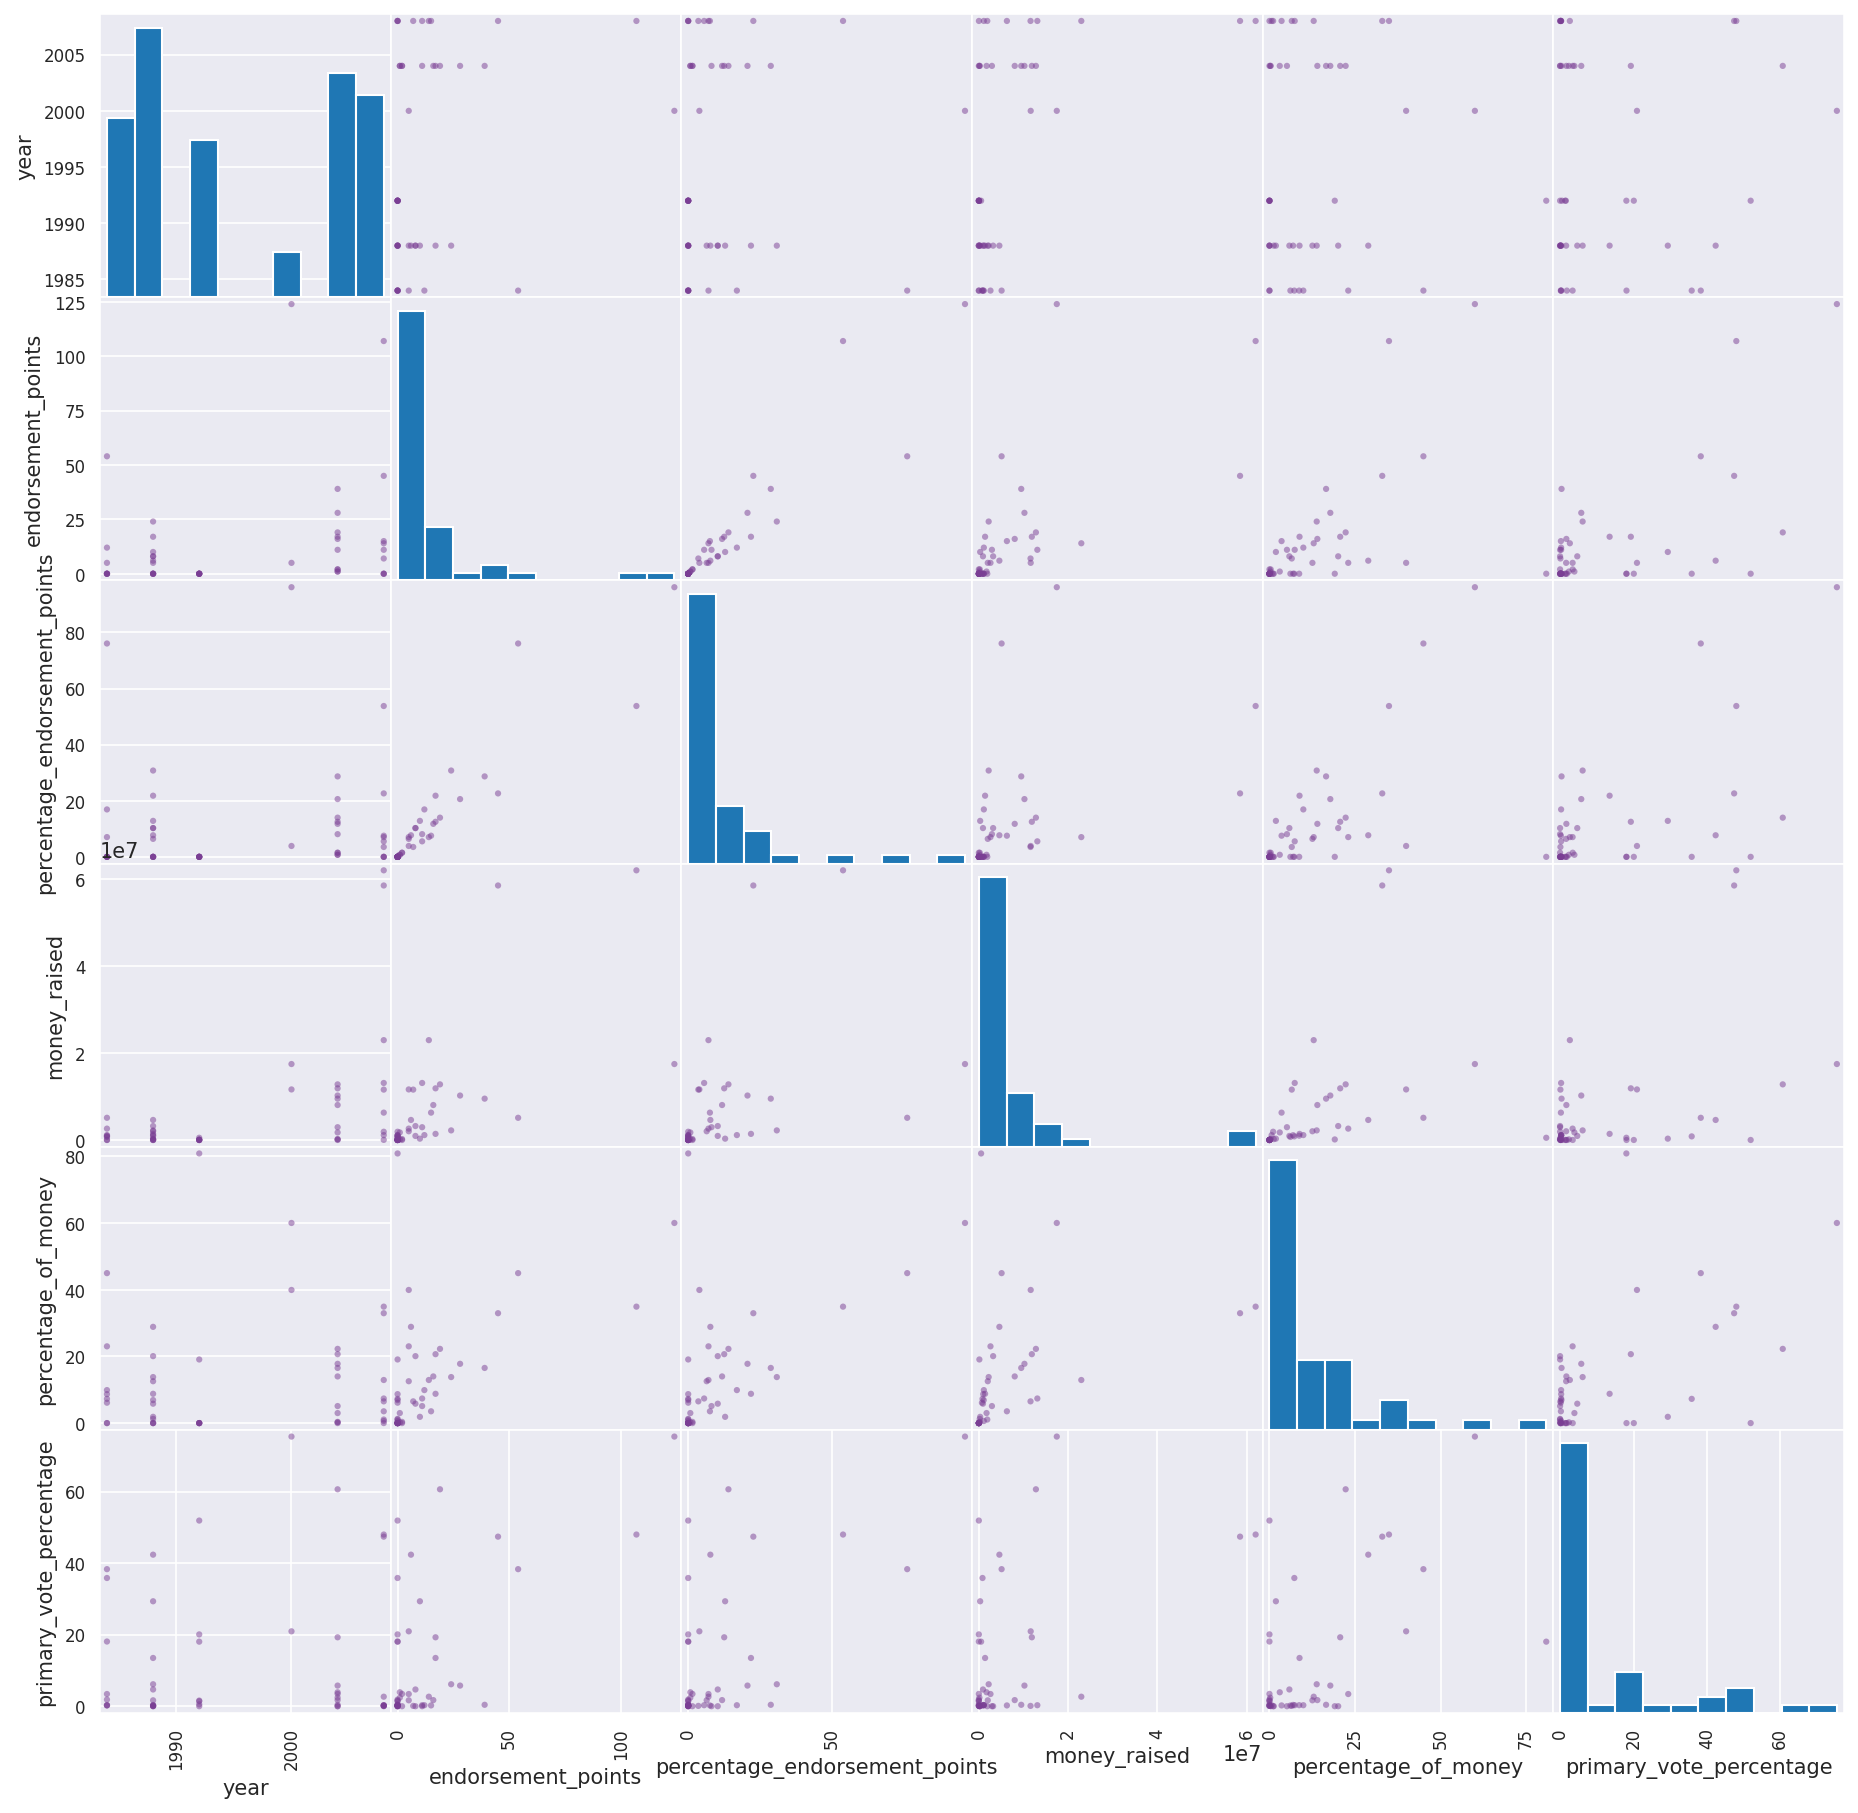

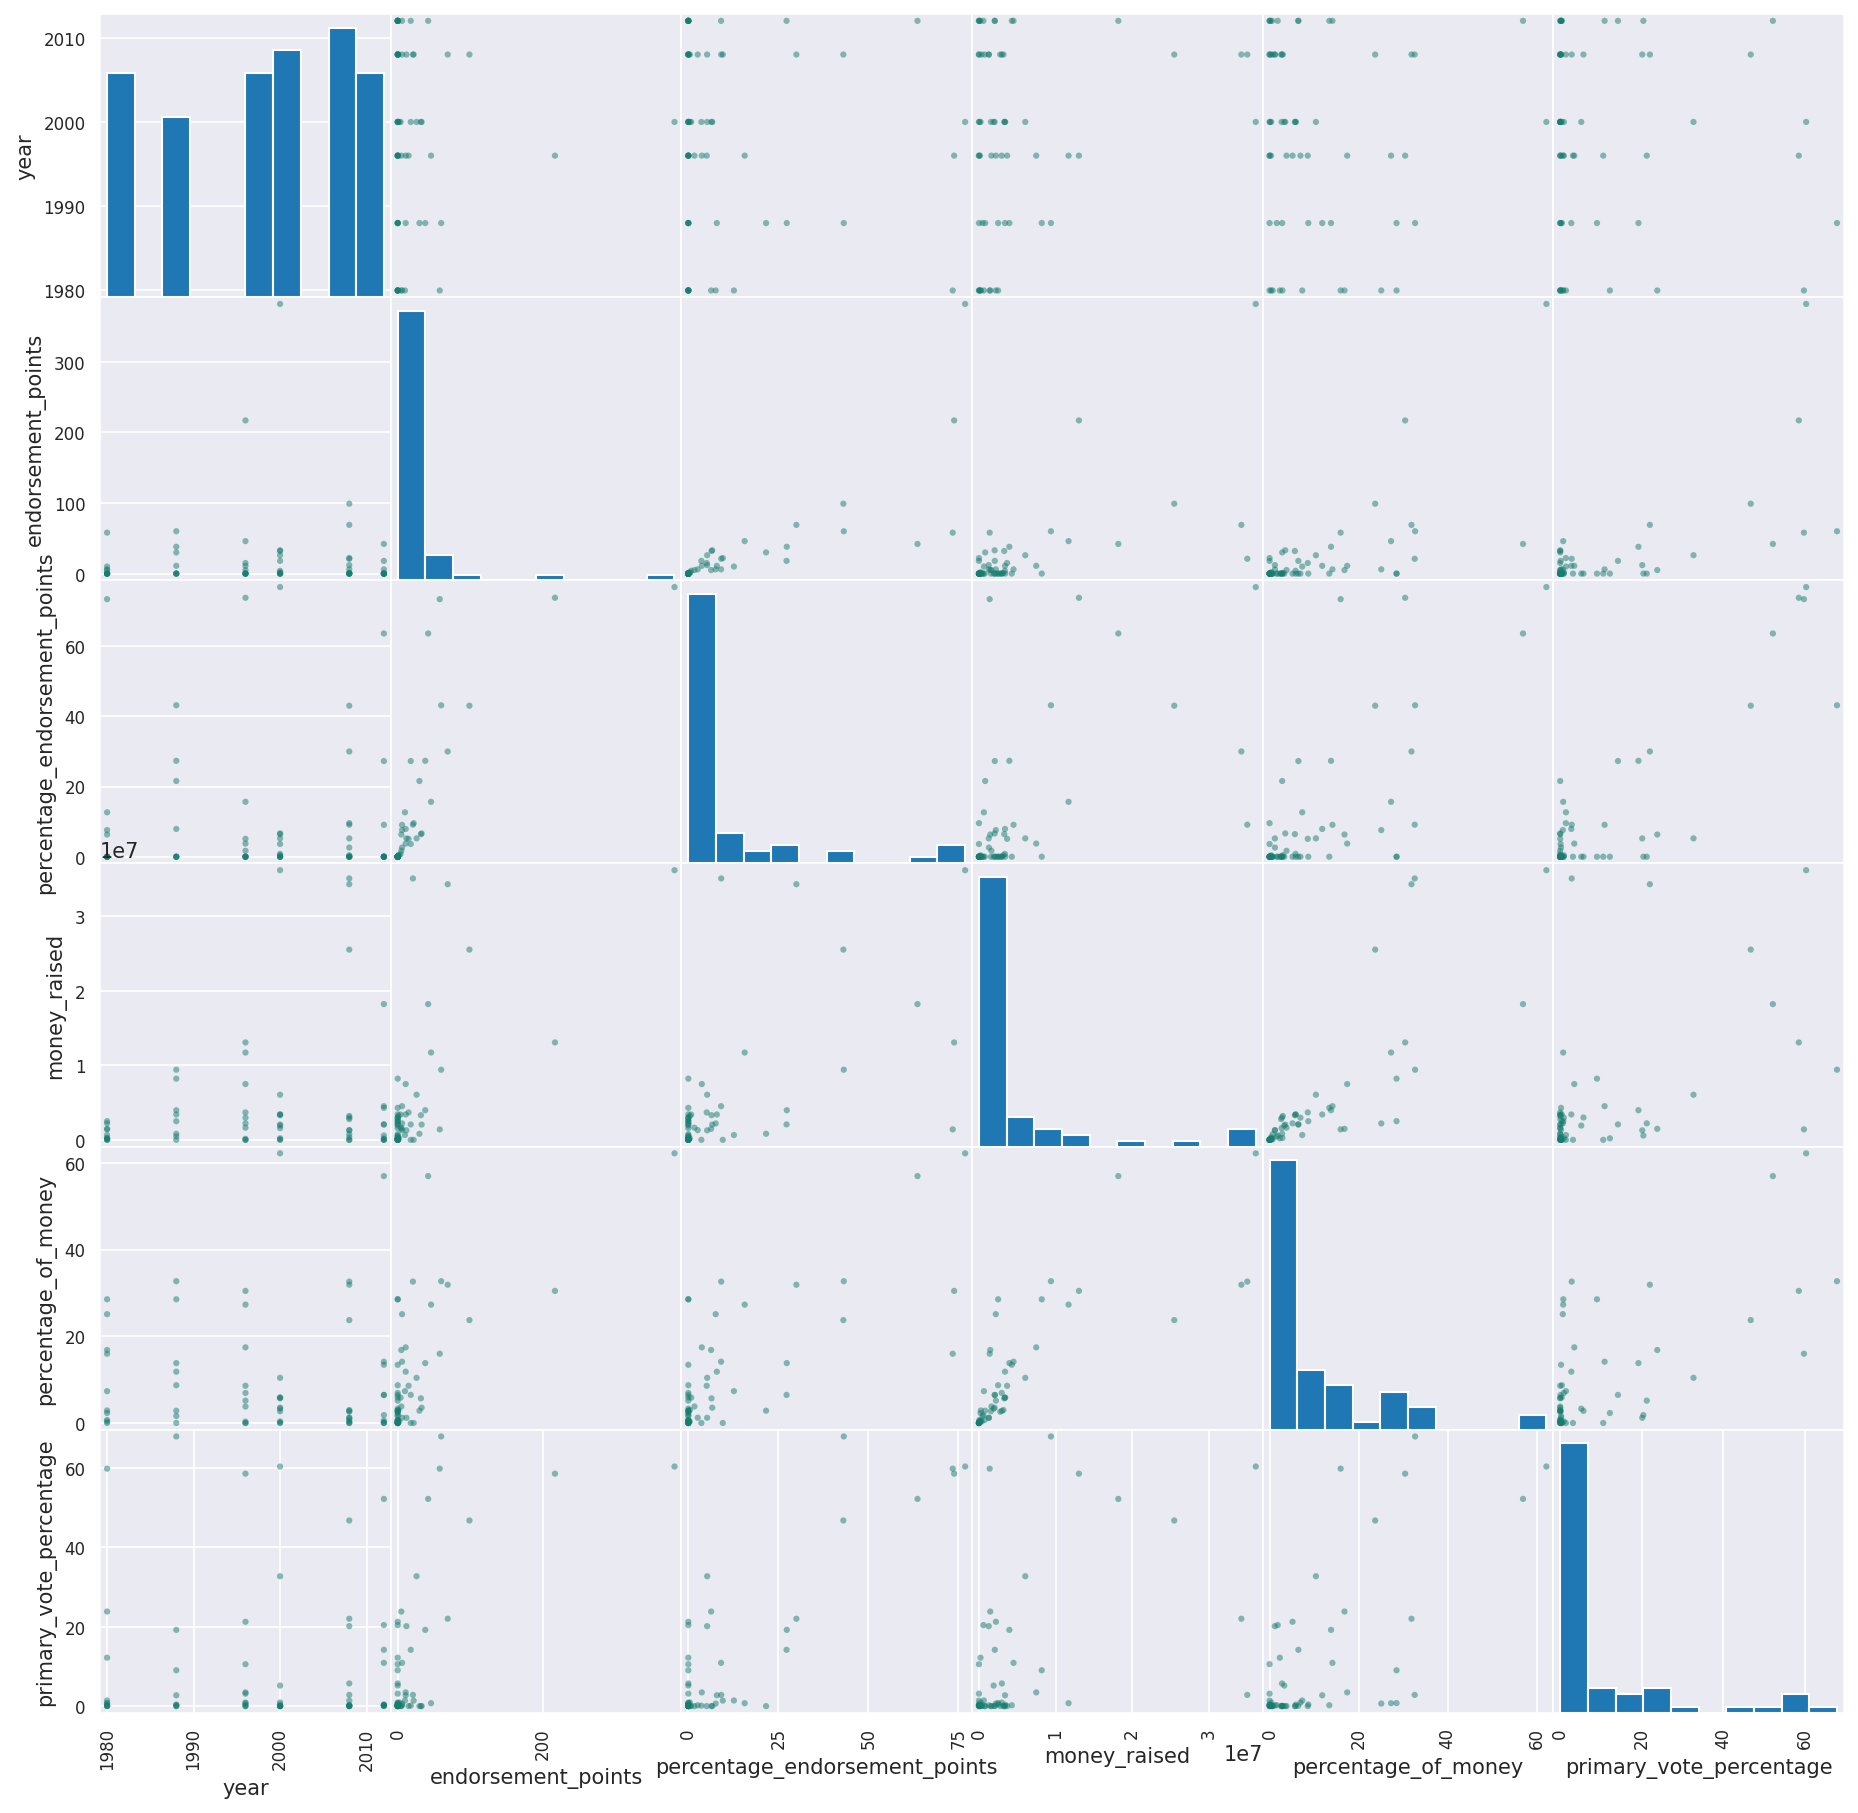

In [24]:
scatter_matrix(data_dem, figsize = (15,15), c='#7a3e94');
scatter_matrix(data_rep, figsize = (15,15), c='#177d6f');

In [25]:
# data.corr(method ='pearson')

In [26]:
# data.plot.scatter(x='endorsement_points', y='money_raised', figsize = (10,10));

In [27]:
# data.plot.scatter(x='primary_vote_percentage', y='money_raised', figsize = (10,10));

In [28]:
#Variables cuantitativas
#1) Sobre variables de este tipo calcular las siguientes medidas de resumen, y armar un
#nuevo dataframe con estos datos:
#● Media
#● Mediana
#● Moda
#● Primer y tercer cuartil
#● Rango

#year no tiene sentido

data_vcuantitativas = data[['endorsement_points', 'percentage_endorsement_points', 'money_raised', 'percentage_of_money', 'primary_vote_percentage']]

def q_25 (x): 
    return x.quantile(q = 0.25)

def q_75 (x): 
    return x.quantile(q = 0.75)

data_vcuantitativas.agg(['mean', 'median', q_25, q_75, 'min', 'max'])

#data_vcuantitativas.describe()

,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage
mean,17.59633,10.091742,5.225899e+06,11.008991,10.807431
median,2.00000,0.735294,1.567088e+06,5.680000,0.910000
q_25,0.00000,0.000000,1.388260e+05,0.360000,0.110000
q_75,16.00000,9.565220,4.288336e+06,15.970000,14.170000
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000
max,382.00000,96.124000,6.198149e+07,80.910000,75.390000


In [29]:
#3) Seleccionar un subconjunto de variables que resulten de interés y analizarlas utilizando:
#● Histogramas
#● Gráfico de violín (utilizar la librería matplotlib.pyplot)
#● Boxplots
#● Density plot. Analizar si los datos presentan algún tipo de asimetría y explicar
#cuál.
#● Gráfico a elección. Seleccionar otro tipo de gráfico de una librería distinta a las
#propuestas en la materia y realizar un análisis a elección.

Histogramas de las variables **puntos de apoyo** y **porcentaje de votos en elecciones primarias**  
(Violeta = Partido Demócrata || Verde = Partido Republicano)

<AxesSubplot:title={'center':'Cantidad de votos de apoyo'}, ylabel='Frequency'>

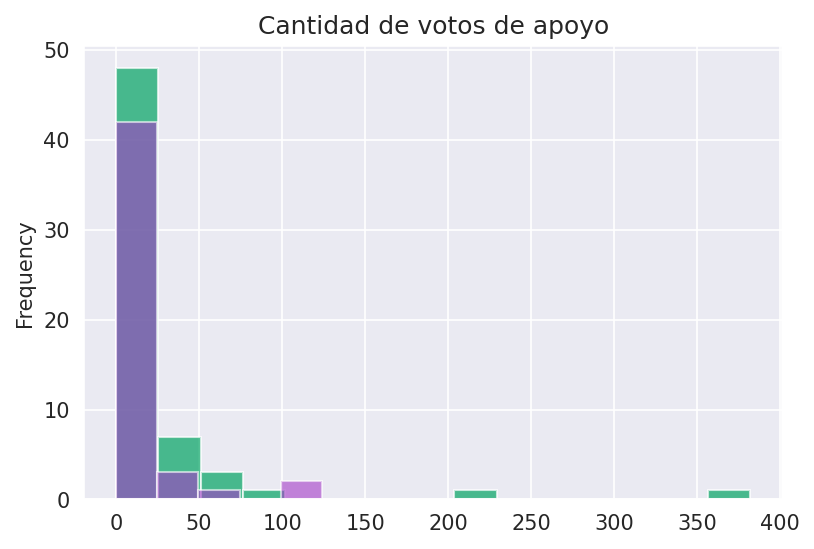

In [30]:
data_rep['endorsement_points'].plot.hist(bins=15, color='#02a363', alpha=0.7) # Más bins ya que el máximo es mucho mayor
data_dem['endorsement_points'].plot.hist(bins=5, color='#a43bc7', alpha=0.6, title='Cantidad de votos de apoyo')


<AxesSubplot:title={'center':'Porcentaje de dinero recaudado'}, ylabel='Frequency'>

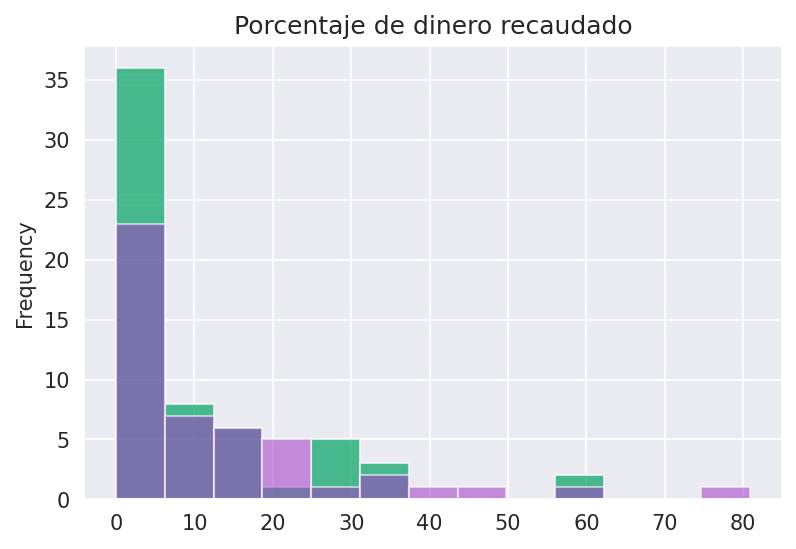

In [31]:
data_rep['percentage_of_money'].plot.hist(bins=10, color='#02a363', alpha=0.7) # Menos bins ya que el máximo es menor
data_dem['percentage_of_money'].plot.hist(bins=13, color='#a43bc7', alpha=0.55, title = 'Porcentaje de dinero recaudado')

In [32]:
import altair as alt

s = data[['primary_vote_percentage', 'percentage_of_money']]

bar = alt.Chart(s).mark_bar().encode(
    x='percentage_of_money:O',
    y='primary_vote_percentage:Q'
)

rule = alt.Chart(s).mark_rule(color='red').encode(
    y='mean(primary_vote_percentage):Q'
)

(bar + rule).properties(width=600)

alt.LayerChart(...)

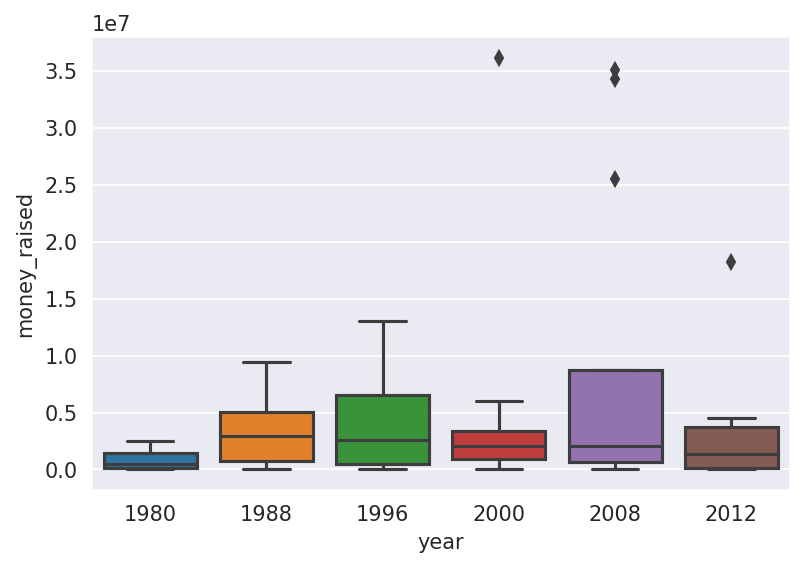

In [33]:
ax = sns.boxplot(x='year', y= 'money_raised', data=data_rep)

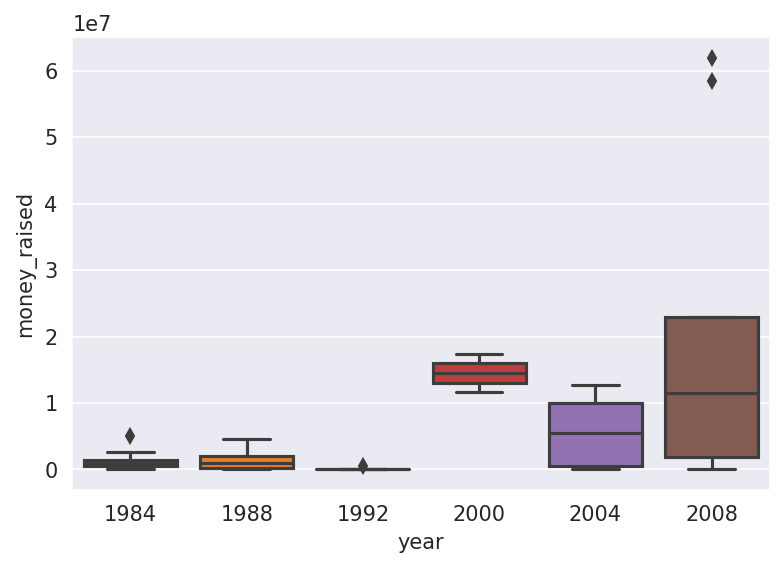

In [34]:
ax = sns.boxplot(x='year', y= 'money_raised', data=data_dem)

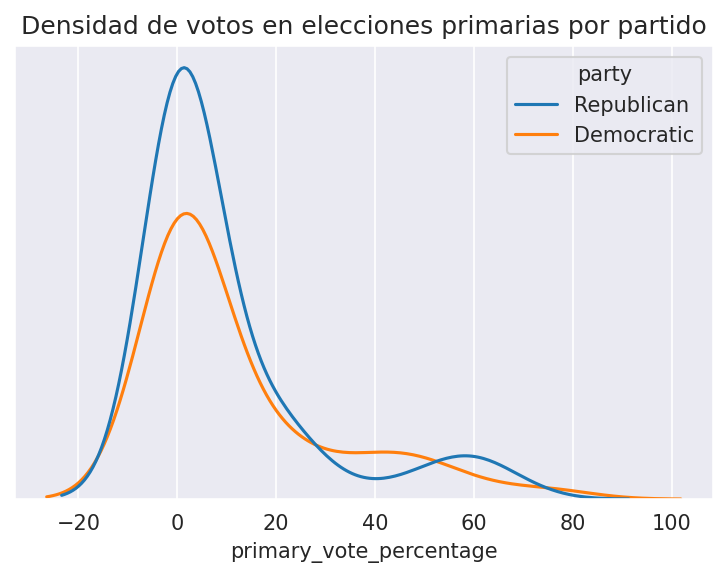

In [35]:
#ax = sns.kdeplot(data=data, x='primary_vote_percentage', hue='party', clip= (0, 100))
ax = sns.kdeplot(data=data, x='primary_vote_percentage', hue='party')
ax.set_title("Densidad de votos en elecciones primarias por partido")
ax.set_ylabel('')
plt.yticks([])
plt.show()

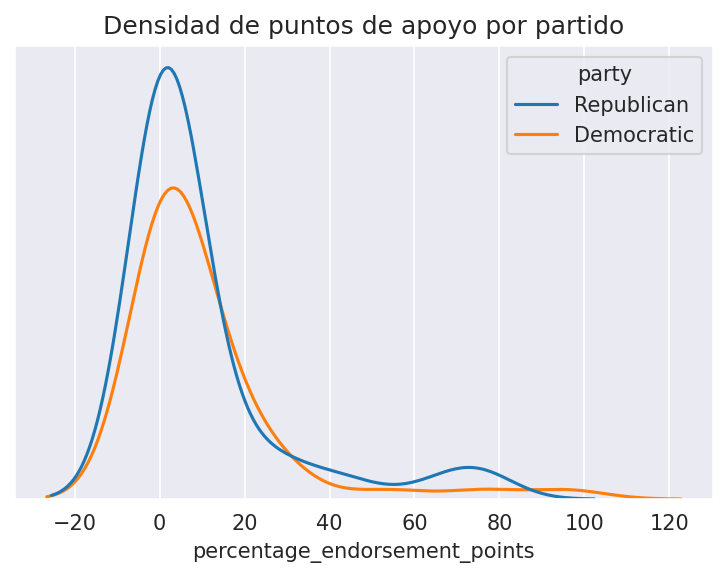

In [36]:
#ax = sns.kdeplot(data=data, x='percentage_endorsement_points', hue='party', clip= (0, 100))
ax = sns.kdeplot(data=data, x='percentage_endorsement_points', hue='party')
ax.set_title("Densidad de puntos de apoyo por partido")
ax.set_ylabel('')
plt.yticks([])
plt.show()

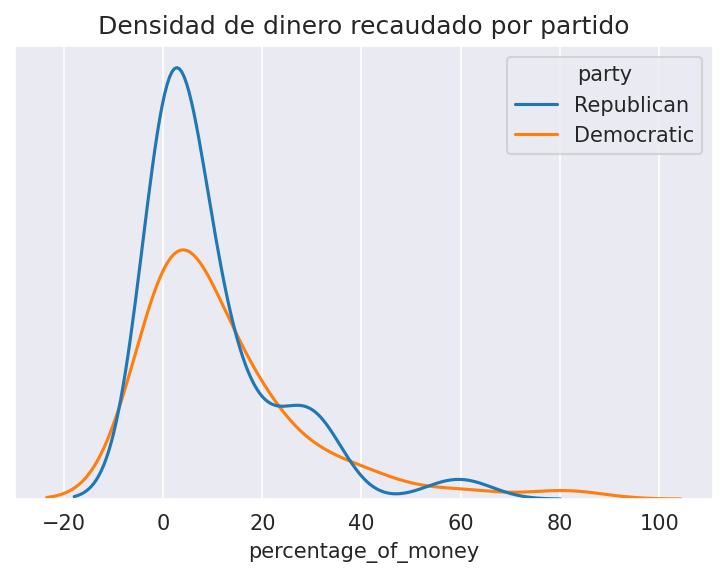

In [37]:
#ax = sns.kdeplot(data=data, x='percentage_of_money', hue='party', clip= (0,100))
ax = sns.kdeplot(data=data, x='percentage_of_money', hue='party')
ax.set_title("Densidad de dinero recaudado por partido")
ax.set_ylabel('')
plt.yticks([])
plt.show()

#### Referencias

[Generador de citas](https://www.mybib.com/)
(usar APA7 para las referencias)

Mehta, D. (2022, April 6). fivethirtyeight/data. Endorsements through June 30. https://github.com/fivethirtyeight/data/blob/master/endorsements-june-30/README.md

Enten, H. (2015, June 15). Pols And Polls Say The Same Thing: Jeb Bush Is A Weak Front-Runner. FiveThirtyEight. https://fivethirtyeight.com/features/pols-and-polls-say-the-same-thing-jeb-bush-is-a-weak-front-runner/